#### Example of Regression Analysis Using the Boston Housing Data Set.

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print (boston.data.shape)
print (boston.target.shape)

(506, 13)
(506,)


In [8]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)

In [9]:
print (boston.data)

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43]
 ...
 [  0.18   0.     9.69   0.     0.58   5.57  73.5    2.4    6.   391.    19.2  395.77  15.1 ]
 [  0.22   0.     9.69   0.     0.58   6.03  79.7    2.5    6.   391.    19.2  396.9   14.33]
 [  0.06   0.    11.93   0.     0.57   6.59  69.1    2.48   1.   273.    21.   391.99   9.67]
 [  0.05   0.    11.93   0.     0.57   6.12  76.7    2.

In [10]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [11]:
# First 10 elements of the data
print (x[:10])

[[  0.01  18.     2.31   0.     0.54   6.58  65.2    4.09   1.   296.    15.3  396.9    4.98   1.  ]
 [  0.03   0.     7.07   0.     0.47   6.42  78.9    4.97   2.   242.    17.8  396.9    9.14   1.  ]
 [  0.03   0.     7.07   0.     0.47   7.18  61.1    4.97   2.   242.    17.8  392.83   4.03   1.  ]
 [  0.03   0.     2.18   0.     0.46   7.    45.8    6.06   3.   222.    18.7  394.63   2.94   1.  ]
 [  0.07   0.     2.18   0.     0.46   7.15  54.2    6.06   3.   222.    18.7  396.9    5.33   1.  ]
 [  0.03   0.     2.18   0.     0.46   6.43  58.7    6.06   3.   222.    18.7  394.12   5.21   1.  ]
 [  0.09  12.5    7.87   0.     0.52   6.01  66.6    5.56   5.   311.    15.2  395.6   12.43   1.  ]
 [  0.14  12.5    7.87   0.     0.52   6.17  96.1    5.95   5.   311.    15.2  396.9   19.15   1.  ]
 [  0.21  12.5    7.87   0.     0.52   5.63 100.     6.08   5.   311.    15.2  386.63  29.93   1.  ]
 [  0.17  12.5    7.87   0.     0.52   6.    85.9    6.59   5.   311.    15.2  386.71  17.1

In [12]:
# First 10 elements of the response variable
print (y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [13]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Let's see predictions for the first 10 instances
print (linreg.predict(x[:10]))

[30.   25.03 30.57 28.61 27.94 25.26 23.   19.54 11.52 18.92]


In [15]:
# Compute RMSE on training data
p = linreg.predict(x)

# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
print (err[:10])

[6.   3.43 4.13 4.79 8.26 3.44 0.1  7.56 4.98 0.02]


In [16]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print (rmse_train)

4.679191295697281


In [17]:
# We can view the regression coefficients
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -0.11   0.05   0.02   2.69 -17.77   3.81   0.    -1.48   0.31  -0.01  -0.95   0.01  -0.52   0.  ]


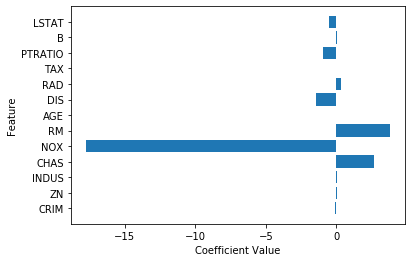

In [18]:
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_[:-1], align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(boston.feature_names), boston.feature_names)

In [19]:
print (linreg.intercept_)

36.45948838508994


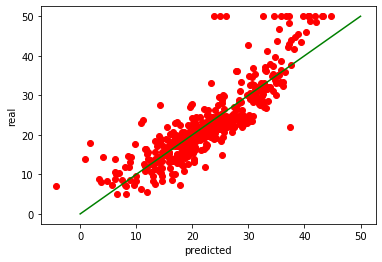

In [20]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()


In [29]:
# Now let's compute RMSE using 10-fold x-validation
n = 10
#kf = KFold(len(x),n_splits=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
#or train,test in kf:
for train, test in kf.split(x):
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
       
rmse_10cv = xval_err/n

KFold(n_splits=10, random_state=None, shuffle=False)


In [30]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 5.1808


#### Let's try Ridge Regression:

In [31]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
# Compute RMSE on training data
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation

n = 10
#kf = KFold(len(x), n_folds=n)

kf = KFold(n_splits=n)
kf.get_n_splits(x)

print(kf)  
KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0
for train, test in kf.split(x):
    ridge.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x[test]))
rmse_10cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

KFold(n_splits=10, random_state=None, shuffle=False)
Method: Ridge Regression
RMSE on training: 4.6854
RMSE on 10-fold CV: 4.3427


#### We can try different values of alpha and observe the impact on x-validation RMSE

In [35]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    

    kf = KFold(n_splits=10)
    kf.get_n_splits(x)
 
    KFold(n_splits=10,random_state=None, shuffle=False)
    # computing RMSE using 10-fold cross validation
    #kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf.split(x):
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.sqrt(np.dot(err,err)/len(x[test]))
    rmse_10cv = xval_err/n
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.6792		 5.1787
0.418	 4.6839		 5.1245
0.826	 4.6917		 5.1011
1.234	 4.6996		 5.0893
1.642	 4.7066		 5.0826
2.050	 4.7128		 5.0785
2.458	 4.7182		 5.0756
2.866	 4.7230		 5.0735
3.274	 4.7271		 5.0718
3.682	 4.7308		 5.0704
4.090	 4.7341		 5.0691
4.498	 4.7370		 5.0679
4.906	 4.7397		 5.0668
5.313	 4.7421		 5.0657
5.721	 4.7443		 5.0647
6.129	 4.7464		 5.0637
6.537	 4.7483		 5.0628
6.945	 4.7500		 5.0618
7.353	 4.7516		 5.0609
7.761	 4.7532		 5.0599
8.169	 4.7546		 5.0590
8.577	 4.7560		 5.0581
8.985	 4.7573		 5.0573
9.393	 4.7585		 5.0564
9.801	 4.7597		 5.0556
10.209	 4.7609		 5.0547
10.617	 4.7620		 5.0539
11.025	 4.7630		 5.0531
11.433	 4.7640		 5.0523
11.841	 4.7650		 5.0515
12.249	 4.7659		 5.0507
12.657	 4.7668		 5.0500
13.065	 4.7677		 5.0492
13.473	 4.7686		 5.0485
13.881	 4.7695		 5.0478
14.289	 4.7703		 5.0471
14.697	 4.7711		 5.0464
15.104	 4.7719		 5.0458
15.512	 4.7727		 5.0451
15.920	 4.7734		 5.0444
16.328	 4.7742		 5

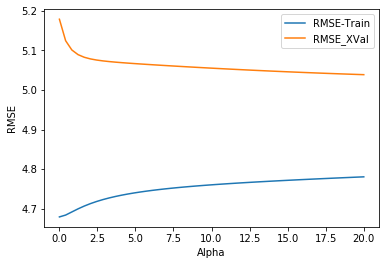

In [36]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

#### To make comparisons across methods easier, let's parametrize the regression methods:

In [38]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    #kf = KFold(len(x), n_folds=10)
    kf = KFold(n_splits=10)
    kf.get_n_splits(x)

    KFold(n_splits=n,random_state=None, shuffle=False)
    err = 0
    for train,test in kf.split(x):
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)
    rmse_10cv = np.sqrt(err/len(x))
    
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 4.6792
RMSE on 10-fold CV: 5.8770


Method: lasso
RMSE on training: 4.8563
RMSE on 10-fold CV: 5.7637


Method: ridge
RMSE on training: 4.6819
RMSE on 10-fold CV: 5.8487


Method: elastic-net
RMSE on training: 4.9067
RMSE on 10-fold CV: 5.4921




#### Now let's try to do regression via Stochastic Gradient Descent.

In [40]:
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.1, max_iter=300)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
#kf = KFold(len(x), n_folds=10)
kf = KFold(n_splits=10)
kf.get_n_splits(x)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0
for train,test in kf.split(x):
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 4.7700
RMSE on 10-fold CV: 5.6124


#### Using the regression implementation from Machine Learning in Action, Chapter 8:

In [42]:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [44]:
w = standRegres(x,y)

In [45]:
print (w)

[[ -0.11]
 [  0.05]
 [  0.02]
 [  2.69]
 [-17.77]
 [  3.81]
 [  0.  ]
 [ -1.48]
 [  0.31]
 [ -0.01]
 [ -0.95]
 [  0.01]
 [ -0.52]
 [ 36.46]]


In [47]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

In [48]:
w_ridge = ridgeRegres(x,y,0.5)
print (w_ridge)

[[-0.1 ]
 [ 0.05]
 [-0.  ]
 [ 2.68]
 [-9.53]
 [ 4.56]
 [-0.  ]
 [-1.26]
 [ 0.25]
 [-0.01]
 [-0.73]
 [ 0.01]
 [-0.49]
 [21.76]]


#### Now that we have the regression coefficients, we can compute the predictions:

In [49]:
xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

In [50]:
yHat.shape

(506, 1)

In [51]:
print (yHat[0:10])

[[29.8 ]
 [24.75]
 [30.78]
 [29.12]
 [28.61]
 [25.35]
 [22.48]
 [19.28]
 [11.21]
 [18.65]]


In [37]:
print yMat.T[0:10]

[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]
 [ 28.7]
 [ 22.9]
 [ 27.1]
 [ 16.5]
 [ 18.9]]


#### Model evaluation and cross validation can be performed as before.

In [56]:
yHat.A.ravel()

array([29.8 , 24.75, 30.78, 29.12, 28.61, 25.35, 22.48, 19.28, 11.21, 18.65, 19.03, 21.15, 20.51, 20.15, 19.84, 19.79,
       21.17, 17.52, 16.23, 18.68, 12.83, 18.15, 16.6 , 14.34, 16.27, 13.62, 15.97, 15.29, 20.45, 21.86, 12.  , 18.54,
        9.45, 14.57, 14.11, 23.35, 21.87, 22.83, 22.8 , 31.37, 34.5 , 28.21, 24.95, 24.47, 22.57, 21.37, 19.91, 17.7 ,
        8.69, 16.69, 20.87, 23.44, 27.51, 23.63, 16.11, 32.02, 25.3 , 32.9 , 22.18, 21.13, 17.87, 18.45, 24.3 , 23.48,
       24.42, 29.71, 24.61, 20.81, 16.99, 20.45, 24.99, 21.23, 24.05, 23.72, 25.05, 23.41, 22.21, 22.65, 20.85, 21.64,
       28.49, 26.86, 25.86, 24.71, 24.63, 27.58, 21.77, 25.22, 30.6 , 30.94, 26.74, 26.96, 28.32, 28.36, 26.22, 28.09,
       24.01, 36.23, 35.56, 32.35, 25.09, 26.15, 19.38, 20.46, 21.48, 18.39, 17.15, 20.78, 22.89, 19.99, 21.01, 26.49,
       20.21, 20.35, 24.68, 19.8 , 23.06, 23.15, 19.73, 20.23, 21.62, 22.15, 20.26, 16.17, 20.16, 22.12, 14.24, 15.59,
       19.85, 14.53, 20.93, 20.25, 20.88, 16.35,

In [57]:
yHat.A.shape

(506, 1)